# 01_EDA.ipynb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("BBDD_FINAL_sintetica.csv")
df.head()

,station,year,season,DBO,DQO,OD,TDS,arsenico,bicarbonato,cadmio,...,nitratos,pH,perifiton_H,perifiton_J,plomo,potasio,sodio,sulfatos,temperatura,zinc
0,CHILI-1,2021,HÃºmeda,6.048422,7.606639,7.555917,154.821863,2.108431,47.052596,0.192954,...,1.015771,8.157850,0.175476,0.119987,1.048643,3.937205,17.027566,46.444176,17.878928,20.443940
1,CHILI-4,2019,Seca,3.619453,14.814122,7.612445,304.857953,1.222365,72.855623,0.070407,...,4.919001,8.038437,0.645816,0.934393,4.073503,6.556775,37.343220,53.714599,17.832196,22.539360
2,CHILI-3,2022,Seca,1.260012,9.784913,8.378081,321.006559,1.814172,72.531431,1.299086,...,4.675352,8.325971,1.462021,0.585827,11.647421,5.699583,37.947816,56.772489,15.103917,66.097356
3,CHILI-2,2023,Seca,2.001775,12.667794,7.713475,330.967015,1.117722,79.038083,0.095896,...,4.884165,7.606297,1.090298,0.639052,7.557435,6.100635,37.021685,59.394286,18.384227,22.807829
4,CHILI-2,2023,Seca,1.464026,12.876578,7.688734,316.876894,1.130597,76.532327,0.098073,...,4.430358,7.570012,1.085216,0.659245,7.097784,6.421333,41.695123,51.572254,17.976359,26.571200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   station                     5000 non-null   object 
 1   year                        5000 non-null   int64  
 2   season                      5000 non-null   object 
 3   DBO                         5000 non-null   float64
 4   DQO                         5000 non-null   float64
 5   OD                          5000 non-null   float64
 6   TDS                         5000 non-null   float64
 7   arsenico                    5000 non-null   float64
 8   bicarbonato                 5000 non-null   float64
 9   cadmio                      5000 non-null   float64
 10  calcio                      5000 non-null   float64
 11  cloruros                    5000 non-null   float64
 12  cobre                       5000 non-null   float64
 13  coliformes termotolerantes  5000 

In [17]:
columnas_mostrar = ["DBO", "DQO", "OD", "pH"]  # Cambia nombres según tu dataset

for col in columnas_mostrar:
    if col not in df.columns:
        raise ValueError(f"⚠ La columna '{col}' no existe en la base. Verifica nombres.")

print("\nVariables a visualizar:", columnas_mostrar)


Variables a visualizar: ['DBO', 'DQO', 'OD', 'pH']


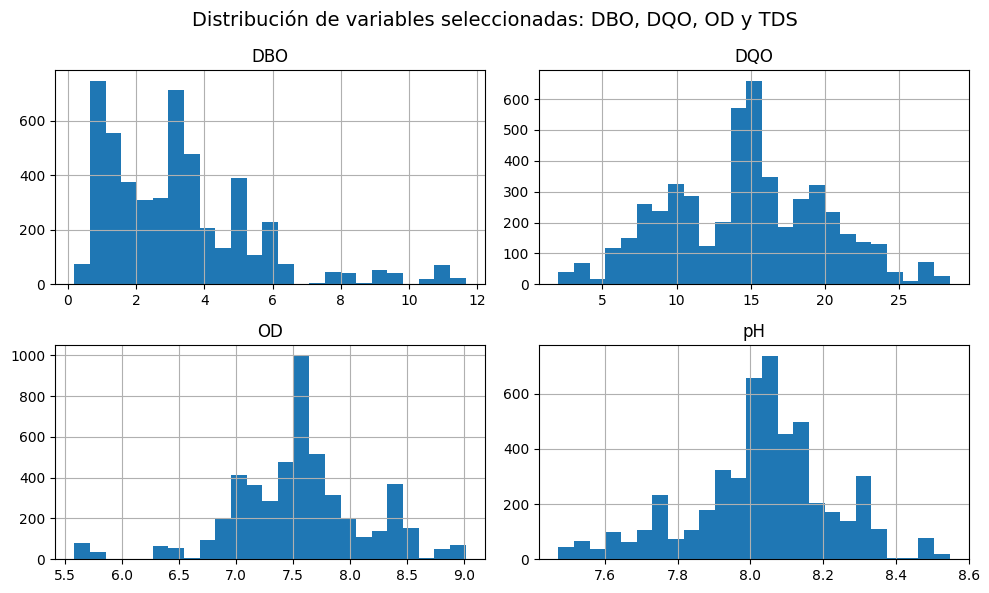

In [18]:
df[columnas_mostrar].hist(figsize=(10,6), bins=25)
plt.suptitle("Distribución de variables seleccionadas: DBO, DQO, OD y TDS", fontsize=14)
plt.tight_layout()
plt.show()

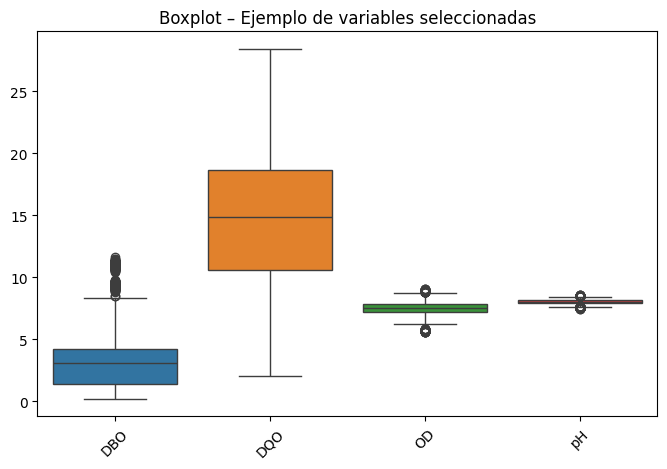

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[columnas_mostrar])
plt.xticks(rotation=45)
plt.title("Boxplot – Ejemplo de variables seleccionadas")
plt.show()

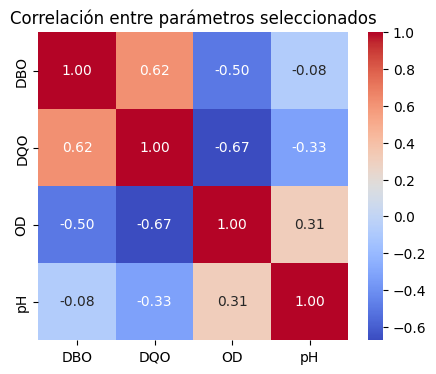

In [20]:
corr = df[columnas_mostrar].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre parámetros seleccionados")
plt.show()

<Figure size 800x400 with 0 Axes>

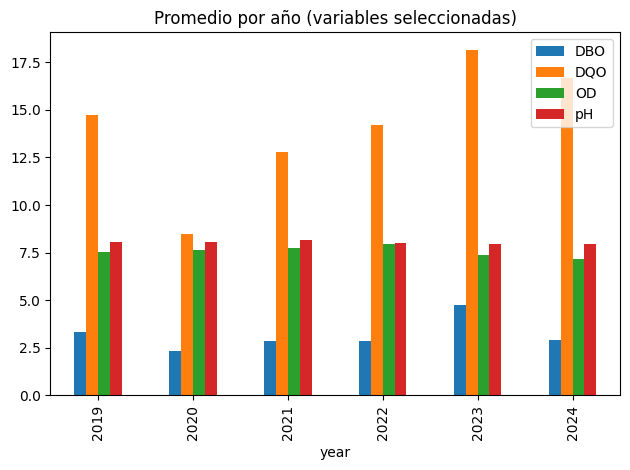

In [21]:
if "year" in df.columns:
    plt.figure(figsize=(8,4))
    df.groupby("year")[columnas_mostrar].mean().plot(kind='bar')
    plt.title("Promedio por año (variables seleccionadas)")
    plt.tight_layout()
    plt.show()

if "estacion" in df.columns:
    plt.figure(figsize=(8,4))
    df.groupby("estacion")[columnas_mostrar].mean().plot(kind='bar')
    plt.title("Promedio por estación (variables seleccionadas)")
    plt.tight_layout()
    plt.show()